# An optimization using Gauss-Newton method

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rosenbrock function

In [2]:
def rosenbrock(x,y):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock_grad(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = -400.*p1*(p2-p1**2) - 2.*(1.- p1)
    J2 = 200.*(p2-p1**2)
    J = np.array([J1,J2])
    return J

In [4]:
def residual_ros(x,y):
    '''
    Calculate the residual of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = 10.*(p2-p1**2)
    J2 = (1.-p1)
    r = np.array([J1,J2])
    return r

In [5]:
def sensitivity_ros(x,y):
    '''
    Calculate the sensitivity matrix of rosenbrock function.
    '''
    p1 = x
    p2 = y
    
    A11 = -20.*p1
    A12 = 10.
    A21 = -1.
    A22 = 0.
    A = np.array([A11,A12,A21,A22]).reshape(2,2)
    return A

## Parameters for calculating the rosenbrock function 

In [6]:
Nx = 20
Ny = 20

In [7]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [8]:
Z = rosenbrock(X,Y) 

In [9]:
Z_ros = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rosenbrock function 


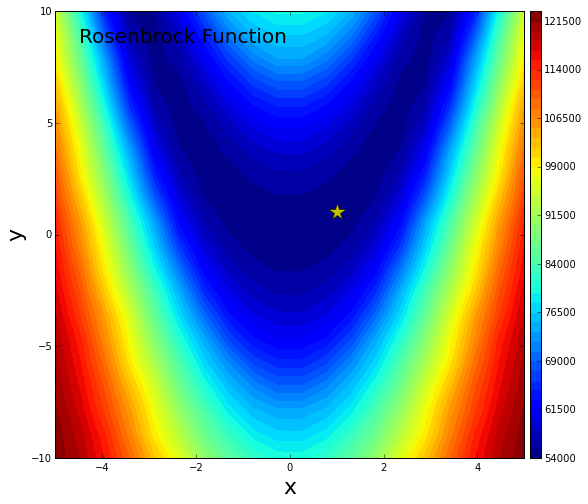

In [10]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1.,'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Gauss-Newton method for Rosenbrock

In [11]:
itmax = 10

px = []
py = []

px0 = -1.
py0 = 7.

px.append(px0)
py.append(py0)

phi = []
it = []
for i in range(itmax):
    A = sensitivity_ros(px[i],py[i])
    AtA = np.dot(A.T,A)
    
    res = residual_ros(px[i],py[i])
    Atr = np.dot(A.T,res)
    
    dp = np.linalg.solve(AtA,-Atr)    
    
    px.append(px[i] + dp[0])
    py.append(py[i] + dp[1])
    
    f_plus = rosenbrock(px[i+1],py[i+1])
    phi.append(f_plus)
    it.append(i)
    
    print 'iteration:', i
    print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    print 'Rosenbrock value:', f_plus


iteration: 0
p1 = -1.00 | p2 = 7.00
Rosenbrock value: 1600.0
iteration: 1
p1 = 1.00 | p2 = -3.00
Rosenbrock value: 4.93038065763e-32
iteration: 2
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 3
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 4
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 5
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 6
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 7
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 8
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 9
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0


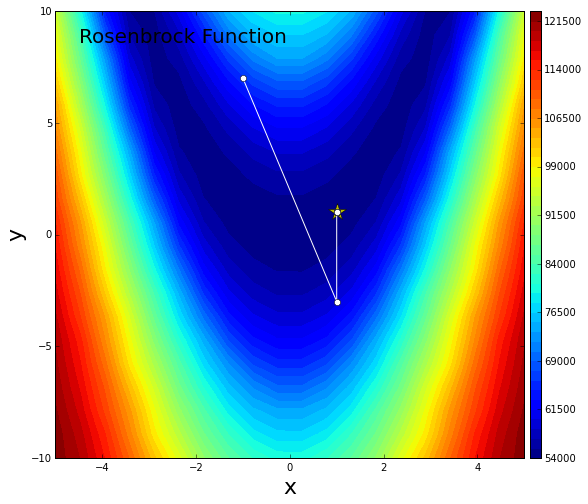

In [12]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1.,'y*',markersize=18)
plt.plot(px,py,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Comparison between these two tests

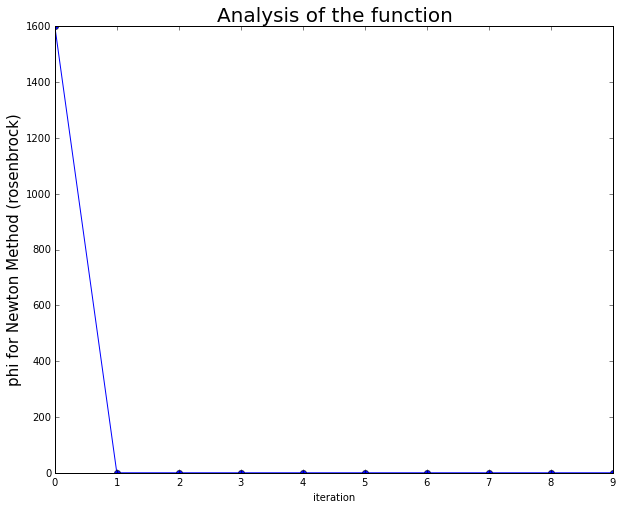

In [13]:
plt.figure(figsize=(10,8))

plt.plot(it, phi, 'o-')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('phi for Newton Method (rosenbrock)',fontsize=15)
plt.xlabel('iteration',)

plt.show()
